In [69]:
import pandas as pd
import numpy as np
import mpu
import json
import re  
pd.set_option('display.max_columns', None)
house = pd.read_csv('../data/house_combined.csv')
bus = pd.read_csv('../data/bus_stops_file.csv')
train = pd.read_csv('../data/train_stops_file.csv')
tram = pd.read_csv('../data/tram_stops_file.csv')
vline = pd.read_csv('../data/vline_stops_file.csv')
population = pd.read_excel('../data/Population.xlsx')
income = pd.read_excel('../data/Income.xlsx',sheet_name="Forecasted Income",header=1)
male = pd.read_excel('../data/Sex & Age by Year.xlsx', sheet_name="Male")
female = pd.read_excel('../data/Sex & Age by Year.xlsx', sheet_name="Female")
school = pd.read_csv('../data/school.csv',sep=",", encoding='cp1252')
hospital = pd.read_csv('../data/hospital_csv',sep=",", encoding='cp1252')
data_2019 = pd.read_csv('../data/2019_data.csv',sep=",", encoding='cp1252')
data_2020 = pd.read_csv('../data/2020_data.csv',sep=",", encoding='cp1252')
data_2021 = pd.read_csv('../data/2021_data.csv',sep=",", encoding='cp1252')
data_2022 = pd.read_csv('../data/2022_data.csv',sep=",", encoding='cp1252')


In [70]:
data_2019[data_2019["postcode"]>3000]
house.columns

Index(['Unnamed: 0', 'propertyTypes', 'objective', 'addressParts',
       'advertiserIdentifiers', 'bathrooms', 'bedrooms', 'carspaces',
       'dateUpdated', 'dateListed', 'geoLocation', 'priceDetails',
       'landAreaSqm', 'dateAvailable', 'postcode', 'surburb', 'year', 'month',
       'price', 'bond', 'rent', 'state'],
      dtype='object')

In [71]:

need_col = [
    "Unnamed: 0",
    "propertyTypes",
    "bathrooms",
    "bedrooms",
    "carspaces",
    "dateUpdated",
    "dateListed",
    "geoLocation",
    "landAreaSqm",
    "postcode",
    "surburb",
    'year', 
    'month',
    'price', 
    'bond',
    'rent'
]

init_house = house[need_col]
init_house.rename(columns={"Unnamed: 0":"index"}, inplace=True)
init_house["geoLocation"] = init_house["geoLocation"].apply(lambda x: re.sub('\'','\"', str(x)))
init_house = init_house[init_house["geoLocation"] != 'nan']
init_house['longitude'] = init_house['geoLocation'].apply(lambda d: json.loads(d)["longitude"])
init_house['latitude'] = init_house['geoLocation'].apply(lambda d: json.loads(d)["latitude"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_27236\2580550232.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_house.rename(columns={"Unnamed: 0":"index"}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27236\2580550232.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  init_house["geoLocation"] = init_house["geoLocation"].apply(lambda x: re.sub('\'','\"', str(x)))


In [72]:

merge_bus = pd.merge(init_house,bus,how='left',on='postcode')
merge_bus["tmp"] = np.sin(merge_bus["stop_latitude"] - merge_bus["latitude"] / 2)**2 + np.cos(merge_bus["latitude"]) * np.cos(merge_bus["stop_latitude"]) * np.sin(merge_bus["stop_longitude"] - merge_bus["longitude"] / 2)**2
merge_bus["bus_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_bus["tmp"]), np.sqrt(1 - merge_bus["tmp"]))


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
bus_stop_min = pd.DataFrame(merge_bus.groupby(["index",'postcode'])["bus_stop_distance"].min())
# bus_stop_min
bus_stop_count = pd.DataFrame(merge_bus.groupby(["index",'postcode'])["bus_stop_distance"].count())
# bus_stop_count
init_house = pd.merge(init_house,bus_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,bus_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"bus_stop_distance_x":"distance of the closest bus stop","bus_stop_distance_y":"count of bus stop"}, inplace=True)
# init_house

In [74]:
merge_train = pd.merge(init_house,train,how='left',on='postcode')
merge_train["tmp"] = np.sin(merge_train["stop_latitude"] - merge_train["latitude"] / 2)**2 + np.cos(merge_train["latitude"]) * np.cos(merge_train["stop_latitude"]) * np.sin(merge_train["stop_longitude"] - merge_bus["longitude"] / 2)**2
merge_train["train_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_train["tmp"]), np.sqrt(1 - merge_train["tmp"]))
train_stop_min = pd.DataFrame(merge_train.groupby(["index",'postcode'])["train_stop_distance"].min())
train_stop_count = pd.DataFrame(merge_train.groupby(["index",'postcode'])["train_stop_distance"].count())
init_house = pd.merge(init_house,train_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,train_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"train_stop_distance_x":"distance of the closest train stop","train_stop_distance_y":"count of train stop"}, inplace=True)


In [75]:
merge_tram = pd.merge(init_house,tram,how='left',on='postcode')
merge_tram["tmp"] = np.sin(merge_tram["stop_latitude"] - merge_tram["latitude"] / 2)**2 + np.cos(merge_tram["latitude"]) * np.cos(merge_tram["stop_latitude"]) * np.sin(merge_tram["stop_longitude"] - merge_bus["longitude"] / 2)**2
merge_tram["tram_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_tram["tmp"]), np.sqrt(1 - merge_tram["tmp"]))
tram_stop_min = pd.DataFrame(merge_tram.groupby(["index",'postcode'])["tram_stop_distance"].min())
tram_stop_count = pd.DataFrame(merge_tram.groupby(["index",'postcode'])["tram_stop_distance"].count())
init_house = pd.merge(init_house,tram_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,tram_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"tram_stop_distance_x":"distance of the closest tram stop","tram_stop_distance_y":"count of tram stop"}, inplace=True)

In [76]:
merge_vline = pd.merge(init_house,vline,how='left',on='postcode')
merge_vline["tmp"] = np.sin(merge_vline["stop_latitude"] - merge_vline["latitude"] / 2)**2 + np.cos(merge_vline["latitude"]) * np.cos(merge_vline["stop_latitude"]) * np.sin(merge_vline["stop_longitude"] - merge_vline["longitude"] / 2)**2
merge_vline["vline_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_vline["tmp"]), np.sqrt(1 - merge_vline["tmp"]))
vline_stop_min = pd.DataFrame(merge_vline.groupby(["index",'postcode'])["vline_stop_distance"].min())
vline_stop_count = pd.DataFrame(merge_vline.groupby(["index",'postcode'])["vline_stop_distance"].count())
init_house = pd.merge(init_house,vline_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house = pd.merge(init_house,vline_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"vline_stop_distance_x":"distance of the closest vline stop","vline_stop_distance_y":"count of vline stop"}, inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [77]:
merge_school = pd.merge(init_house,school,how='left',left_on='postcode',right_on="Address_Postcode")
merge_school["tmp"] = np.sin(merge_school["Y"] - merge_school["latitude"] / 2)**2 + np.cos(merge_school["latitude"]) * np.cos(merge_school["Y"]) * np.sin(merge_school["X"] - merge_vline["longitude"] / 2)**2
merge_school["school_distance"] = 2 * np.arctan2(np.sqrt(merge_school["tmp"]), np.sqrt(1 - merge_school["tmp"]))
school_stop_min = pd.DataFrame(merge_school.groupby(["index",'Address_Postcode'])["school_distance"].min())
school_stop_count = pd.DataFrame(merge_school.groupby(["index",'Address_Postcode'])["school_distance"].count())
init_house = pd.merge(init_house,school_stop_min,how='left',left_on=['index','postcode'],right_on=['index','Address_Postcode'])
init_house = pd.merge(init_house,school_stop_count,how='left',left_on=['index','postcode'],right_on=['index','Address_Postcode'])
init_house.rename(columns={"school_distance_x":"distance of the closest school","school_distance_y":"count of school"}, inplace=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
merge_hospital = pd.merge(init_house,hospital,how='left',on='postcode')
merge_hospital
hospital_count = pd.DataFrame(merge_hospital.groupby(["index",'postcode'])["name"].count())
hospital_count
init_house = pd.merge(init_house,hospital_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
init_house.rename(columns={"name":"count of hospital"}, inplace=True)

In [80]:
init_house.to_csv("../data/curated/init_house.csv")

In [ ]:
# merge_sc = pd.merge(init_house,shopping_center,how='left',on='postcode')
# merge_sc
# merge_sc["tmp"] = np.sin(merge_sc["stop_latitude"] - merge_sc["latitude"] / 2)**2 + np.cos(merge_sc["latitude"]) * np.cos(merge_sc["stop_latitude"]) * np.sin(merge_sc["stop_longitude"] - merge_vline["longitude"] / 2)**2
# merge_sc["vline_stop_distance"] = 2 * np.arctan2(np.sqrt(merge_sc["tmp"]), np.sqrt(1 - merge_sc["tmp"]))
# vline_stop_min = pd.DataFrame(merge_vline.groupby(["index",'postcode'])["vline_stop_distance"].min())
# vline_stop_count = pd.DataFrame(merge_vline.groupby(["index",'postcode'])["vline_stop_distance"].count())
# init_house = pd.merge(init_house,vline_stop_min,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
# init_house = pd.merge(init_house,vline_stop_count,how='left',left_on=['index','postcode'],right_on=['index','postcode'])
# init_house.rename(columns={"vline_stop_distance_x":"distance of the closest vline stop","vline_stop_distance_y":"count of vline stop"}, inplace=True)

KeyError: 'postcode'

,index,propertyTypes,bathrooms,bedrooms,carspaces,dateUpdated,dateListed,geoLocation,landAreaSqm,postcode,surburb,year,month,price,bond,rent,longitude,latitude,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,count of tram stop,distance of the closest vline stop,count of vline stop,distance of the closest school,count of school,name
0,4256,['apartmentUnitFlat'],1.0,1.0,0.0,2019-01-09T00:23:18.123Z,2016-02-16T04:33:49Z,"{""latitude"": -37.8341628, ""longitude"": 144.960...",NaN,3205,south melbourne,2019,1,$360.00 per week,NaN,360.0,144.960873,-37.834163,0.436505,10,NaN,0,0.438447,24,NaN,0,0.441059,3.0,0
1,5429,['apartmentUnitFlat'],2.0,4.0,4.0,2019-01-03T22:51:13.063Z,2018-10-02T00:00:38Z,"{""latitude"": -37.8443239, ""longitude"": 144.943...",NaN,3207,port melbourne,2019,1,$1800.00 per week,NaN,1800.0,144.943722,-37.844324,0.360502,69,NaN,0,0.427958,3,NaN,0,0.413926,2.0,0
2,5437,['apartmentUnitFlat'],2.0,2.0,1.0,2019-01-10T17:10:35.493Z,2018-10-05T04:57:13Z,"{""latitude"": -37.8430561, ""longitude"": 144.94026}",NaN,3207,port melbourne,2019,1,$550.00 per week,NaN,550.0,144.940260,-37.843056,0.364198,69,NaN,0,0.428416,3,NaN,0,0.421795,2.0,0
3,5439,['house'],2.0,3.0,0.0,2019-01-22T00:20:53.707Z,2018-10-05T07:07:14Z,"{""latitude"": -37.846166, ""longitude"": 144.957026}",NaN,3206,albert park,2019,1,$975.00 per week,NaN,975.0,144.957026,-37.846166,0.446261,9,NaN,0,0.461163,21,NaN,0,0.441093,4.0,0
4,5447,['apartmentUnitFlat'],1.0,2.0,1.0,2019-01-17T17:10:07.873Z,2018-10-17T01:02:26Z,"{""latitude"": -37.8408338, ""longitude"": 144.939...",NaN,3207,port melbourne,2019,1,$500.00 per week,NaN,500.0,144.939074,-37.840834,0.366102,69,NaN,0,0.429226,3,NaN,0,0.418889,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80277,333013,['townhouse'],1.0,2.0,1.0,2022-03-21T01:21:52.75Z,2022-03-09T02:28:07Z,"{""latitude"": -36.7365174, ""longitude"": 147.159...",NaN,3698,tawonga south,2022,3,$450 unfurnished or $500 furnished,NaN,NaN,147.159413,-36.736517,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,0
80278,333014,['house'],2.0,3.0,2.0,2022-05-02T03:23:46.94Z,2022-03-23T04:13:37Z,"{""latitude"": -36.73394589999999, ""longitude"": ...",NaN,3698,tawonga south,2022,5,$490 per week,NaN,490.0,147.153535,-36.733946,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,0
80279,333015,['house'],2.0,3.0,1.0,2022-05-13T05:27:18.527Z,2022-05-10T00:57:02Z,"{""latitude"": -36.6861761, ""longitude"": 147.137...",NaN,3697,tawonga,2022,5,$500 per week,NaN,500.0,147.137745,-36.686176,1.565025,1,NaN,0,NaN,0,NaN,0,NaN,0.0,0
80280,333016,['house'],2.0,4.0,0.0,2022-06-22T01:30:54.673Z,2022-05-31T06:16:44Z,"{""latitude"": -36.7329424, ""longitude"": 147.152...",534.0,3698,tawonga south,2022,6,$540 per week,NaN,540.0,147.152703,-36.732942,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,0


In [84]:
# population
income
header = pd.MultiIndex.from_product([['Earner','Median_age','Sum', 'median', 'mean'],['2019','2020','2021','2022']])
# d=([[12,45,67,56],[78,89,45,67],[45,67,89,90],[67,44,56,55]])
income_earner = income.iloc[:,[3,4,5,6]]
income_median_age = income.iloc[:,[7,8,9,10]]
income_sum = income.iloc[:,[11,12,13,14]]
income_median = income.iloc[:,[15,16,17,18]]
income_mean = income.iloc[:,[19,20,21,22]]
income_earner
# df = pd.DataFrame([income_earner,income_median_age,income_sum,income_median,income_mean],columns=header)
# df
# income_mean

,2019,2020,2021,2022
0,8503.447540,9019.555013,9567.571661,10148.885100
1,7673.610510,7743.676448,7813.745816,7813.745816
2,13887.614446,14253.732963,14617.249150,14617.249150
3,13091.389530,13514.038425,13949.221083,13949.221083
4,4322.973567,4407.512769,4483.031429,4483.031429
...,...,...,...,...
457,2395.620188,2444.316676,2477.970211,2477.970211
458,4130.790588,4208.920238,4295.801621,4295.801621
459,5904.175034,5982.515142,6039.823554,6039.823554
460,13412.087251,13692.824973,13954.601692,13954.601692


<AxesSubplot:>

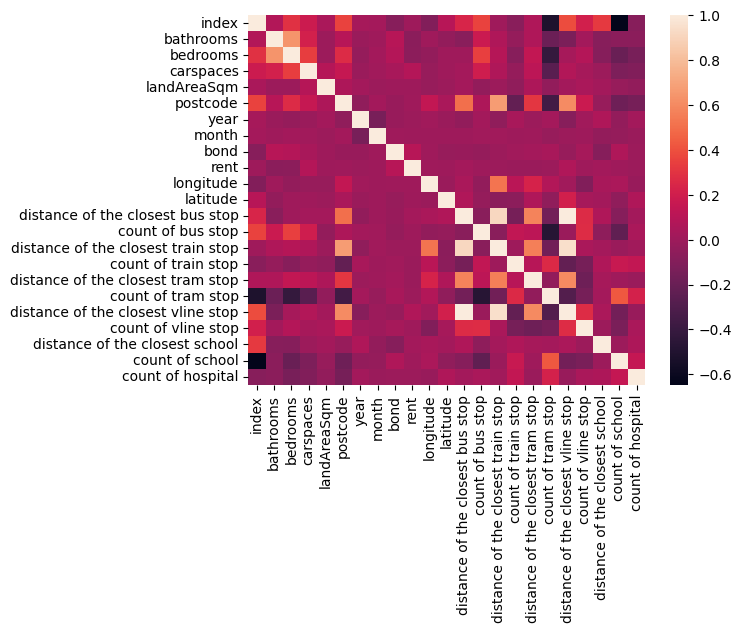

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.subplots()
# ax = plt.axes()
corr = init_house.corr()
sns.heatmap(corr, )